# Spotify Playlist Extraction via Spotipy API

### Data extraction

### Requirements for the projects
1. Internet Access
2. Spotify  Account
2. Spotify Developer Account
3. Spotify Playlist

#### Steps in project
1. Gaining Access to Spotify live data
2. Collecting data
3. Data Preprocessing and EDA

### Step 1. Gaining Access to Spotify Server

In [89]:
# !pip install spotipy

In [90]:
import requests
import base64

import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Inputting Credentials
CLIENT_ID = '59446ee9cb6247218110e06c9b331902'
CLIENT_SECRET = '38b6583176f547cf9a677610406ac6be'

# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}" # Combining the two user credentials
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


### Step 2. Collect Data From Playlist

In [92]:
# Initializing Spotipy with the access token
sp = spotipy.Spotify(auth=access_token)

#### Data I want to collect from API
'Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID',
       'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'

In [93]:
# dir(sp)

In [94]:
# sp.playlist_tracks('5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['name'] #track details
# sp.playlist_tracks('5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['album']['name'] #album_name

In [95]:
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['artists'][0] # Artist Details
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['artists'][0]['name'] # artist_name
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['artists'][0]['id'] # artist_id
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['id'] # Song Id
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['name'] # SOng Name
# sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')['items'][0]['track']['album']['name'] # album name

In [96]:
# Song Characteristics
# playlist['items'][0]['track']['popularity']
# playlist['items'][0]['track']['explicit']
# playlist['items'][0]['track']['duration_ms']

In [97]:
playlist_songs = sp.playlist_items(playlist_id='5FCfw4WmPVuyLiHy8c1nm3')

In [98]:
# Collecting Details on Songs
def playlist_data(playlist_id, access_token):
    """Input your Spotify playlist ID and get the details of the songs in playlist   \n
        playlist_id: A str that is a spotify playlist Id \n
    """
    
#     playlist_id=input('put your playlist id here:')
    # Get the tracks from the playlist
    playlist_songs = sp.playlist_items(playlist_id)    
    song_details = []
    
    for item in playlist_songs['items']:    
        artist = item['track']['artists'][0]['name']
        artist_id = item['track']['artists'][0]['id']
        song_name = item['track']['name']
        album_name = item['track']['album']['name']
        song_id = item['track']['id']
        release_date = item['track']['album']['release_date']
        popularity = item['track']['popularity']
        explicit = item['track']['explicit']
        duration = item['track']['duration_ms']

        # Collecting data for song audio features
        audio_features = sp.audio_features(song_id)    
        key = audio_features[0]['key']
        dance = audio_features[0]['danceability']
        energy = audio_features[0]['energy']
        loud = audio_features[0]['loudness']
        mode = audio_features[0]['mode']
        speech = audio_features[0]['speechiness']
        acoustic = audio_features[0]['acousticness']
        instrument = audio_features[0]['instrumentalness']
        liveness = audio_features[0]['liveness']
        valence = audio_features[0]['valence']
        tempo = audio_features[0]['tempo']

        # Putting data in dictionary
        track_data = {'song_name':song_name,
                    'artist':artist,
                    'album':album_name,
                    'artist_id':artist_id,
                    'song_id':song_id,
                    'popularity':popularity,
                    'explicit':explicit,
                    'duration':duration,
                    'key':key,
                    'danceability':dance,
                    'energy':energy,
                    'loudness':loud,
                    'mode':mode,
                    'speechiness':speech,
                    'acousticness':acoustic,
                    'instrumentalness':instrument,
                    'liveness':liveness,
                    'valence':valence,
                    'tempo':tempo,
                    'release_date':release_date
                     }

        # appending dictionary to list
        song_details.append(track_data)

        # creating DataFrame from dictionary
    df = pd.DataFrame(song_details)
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    return df
    
# df.sample(5)

In [99]:
# Addidng Playlist and Running Function
playlist_id = '46iQn1DHoYNlHwBIOnfAxi' # Apple music top 100 nigerian songs (9 August 2024)
df = playlist_data(playlist_id, access_token)

In [100]:
# Viewing First 5 rows 
df.head()

,song_name,artist,album,artist_id,song_id,popularity,explicit,duration,key,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_date,release_year
0,MMS,Asake,Lungu Boy,3a1tBryiczPAZpgoZN9Rzg,13VXuHw3O8Yt7VwRIDqSo4,69,False,219628,8,0.502,...,-3.367,0,0.1440,0.67700,0.034100,0.1880,0.645,101.837,2024-08-08,2024
1,Active,Asake,Active,3a1tBryiczPAZpgoZN9Rzg,2TOk5OzW5sL83ndKYZJmU7,74,True,172597,1,0.901,...,-10.503,1,0.0515,0.00387,0.000154,0.0571,0.507,112.999,2024-08-06,2024
2,Mood,Asake,Lungu Boy,3a1tBryiczPAZpgoZN9Rzg,5obTyAhp9xms15FjibgrBy,64,False,171385,5,0.707,...,-7.687,0,0.0792,0.62300,0.137000,0.1070,0.700,113.977,2024-08-08,2024
3,Fuji Vibe,Asake,Lungu Boy,3a1tBryiczPAZpgoZN9Rzg,2WHM3orrvvqziSkG0xp8sy,63,False,322209,1,0.503,...,-5.228,1,0.0693,0.02200,0.053300,0.0626,0.746,127.904,2024-08-08,2024
4,Suru (feat. Stormzy),Asake,Lungu Boy,3a1tBryiczPAZpgoZN9Rzg,25KjMlA0KAwRKS9JuT1NSq,63,False,220134,1,0.763,...,-5.538,1,0.0761,0.25600,0.000463,0.1900,0.592,115.099,2024-08-08,2024


In [101]:
# Checking for Missing Values
df.isna().sum().sum()

0

In [102]:
df.duplicated().sum()

0

In [103]:
# Conveeting Duration from ms to mins
df['duration'] =round(df['duration'] / (1000*60))
df['duration'].astype(int)[1]

3

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   song_name         100 non-null    object        
 1   artist            100 non-null    object        
 2   album             100 non-null    object        
 3   artist_id         100 non-null    object        
 4   song_id           100 non-null    object        
 5   popularity        100 non-null    int64         
 6   explicit          100 non-null    bool          
 7   duration          100 non-null    float64       
 8   key               100 non-null    int64         
 9   danceability      100 non-null    float64       
 10  energy            100 non-null    float64       
 11  loudness          100 non-null    float64       
 12  mode              100 non-null    int64         
 13  speechiness       100 non-null    float64       
 14  acousticness      100 non-n

In [105]:
# Converting Release_date to datetime dtype
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
100 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.0 bytes


In [106]:
# Saving Playlist as .csv
df.to_csv('data.csv')

In [107]:
# Making copy
df_copy = df.copy()
df_copy.head(1)

,song_name,artist,album,artist_id,song_id,popularity,explicit,duration,key,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_date,release_year
0,MMS,Asake,Lungu Boy,3a1tBryiczPAZpgoZN9Rzg,13VXuHw3O8Yt7VwRIDqSo4,69,False,4.0,8,0.502,...,-3.367,0,0.144,0.677,0.0341,0.188,0.645,101.837,2024-08-08,2024


### Exploratory Data Analysis

In [108]:
# Most Popular Artists in Playlist
df['artist'].value_counts(ascending=False).reset_index()

,artist,count
0,Asake,17
1,Rema,11
2,Burna Boy,10
3,Seyi Vibez,10
4,Olamide,6
5,Tml Vibez,4
6,Ruger,3
7,Young Jonn,3
8,Omah Lay,2
9,Davido,2


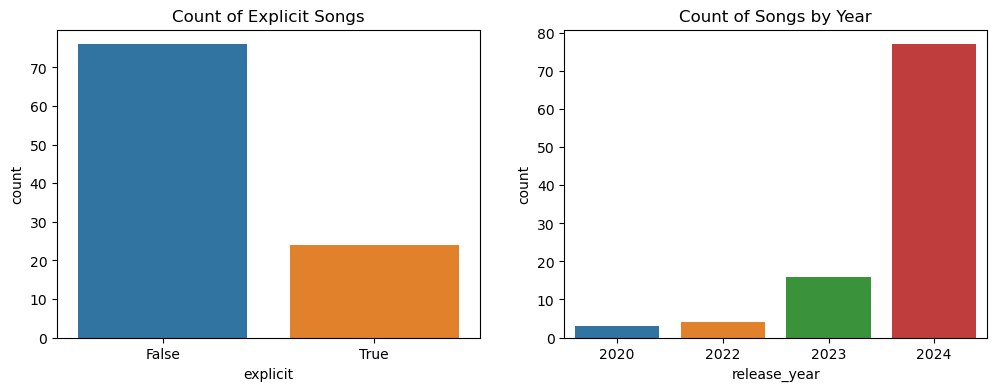

In [109]:
explicit_count = df['explicit'].value_counts()
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x=df['explicit'], ax=ax[0])
ax[0].set_title('Count of Explicit Songs')


sns.countplot(x=df['release_year'])
ax[1].set_title('Count of Songs by Year');

### Top 10 Songs by Popularity

In [110]:
df[['song_name','artist','popularity']].sort_values(ascending=False,by='popularity').head(10)

,song_name,artist,popularity
8,Wave,Asake,76
85,Lonely At The Top,Asake,74
1,Active,Asake,74
51,Tshwala Bam (feat. S.N.E) - Remix,TitoM,73
24,OZEBA,Rema,73
20,Higher,Burna Boy,73
99,One Call,SPINALL,72
38,Dealer,Ayo Maff,71
31,Metaverse,Olamide,70
70,KANTE (feat. Fave),Davido,70


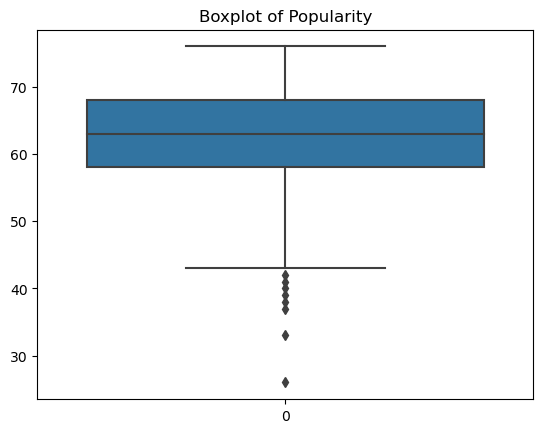

In [111]:
# Average Popularity
sns.boxplot(df['popularity'])
plt.title('Boxplot of Popularity');

In [112]:
df.columns

Index(['song_name', 'artist', 'album', 'artist_id', 'song_id', 'popularity',
       'explicit', 'duration', 'key', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'release_date', 'release_year'],
      dtype='object')

In [113]:
# df.select_dtypes(include=['int','float']).corr()